<div class="jumbotron" style="background:#00F3FF;" >
    <h1>Ad Click Dataset (Grey Atom Hackathon : Team 5)</h1> 
     <p> Predict the probability of whether an ad will get clicked or not.</p>
</div> 

### Team Members :
***
<div class="alert alert-success">
  <strong></strong>
  <li><p> Vivek Shingate</p></li>
  <li><p> Kailas D.</p></li>
  <li><p> Akshay Lakade</p></li>
          
</div>


### Use Case :
***




<div class="panel panel-default">
  <div class="panel-body">A leading affiliate network company from Europe wants to leverage machine learning to improve
(optimise) their conversion rates and eventually their topline. Their network is spread across
multiple countries in europe such as Portugal, Germany, France, Austria, Switzerland etc.
Affiliate network is a form of online marketing channel where an intermediary promotes products
/ services and earns commission based on conversions (click or sign up). The benefit
companies sees in using such affiliate channels is that, they are able to reach to audience which
doesn’t exist in their marketing reach.
The company wants to improve their CPC (cost per click) performance. A future insight about an
ad performance will give them enough headstart to make changes (if necessary) in their
upcoming CPC campaigns.
In this challenge, you have to predict the probability of whether an ad will get clicked or not.
</div>
</div>

### Data Set
***
https://drive.google.com/file/d/1oJCM7LJ5oCcI4PuQH6vTFypAzwsMA0Jz/view?usp=sh
aring

### Data Description
***
You are given three files to download: train.csv, test.csv and sample_submission.csv Variables
in this data set are anonymized due to privacy.
The training data is given for 10 days ( 10 Jan 2017 to 20 Jan 2017). The test data is given for
next 3 days.


### Features Given
***
- ID (Unique ID
- datetime (timestamp
- siteid 
- website id
- offerid (offer id {commission based offers})
- category (offer category)
- merchant (seller ID)
- countrycode (country where affiliates reach is present)
- browserid (browser used)
- devid (device used)
- click (target variable)

### Evaluation Metric :
***

Submission will be evaluated based on AUC-ROC score. Higher the better.

### Helpful techniques:
***

- Mean encoding of variables will help a lot
- Combine two, three, four variables and then generate mean encoding with output
variable. This will help in understanding user behavior and make it easier for ML models
to learn a variety of features.
- Use all standard machine learning models. GBMs and its variants should work well.
- Try different ensembling and stacking techniques to improve the score.

<div class="alert alert-danger">
  <strong>Coding!</strong> Let's begin.
</div>

Library importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing CSV file into dataframe

In [2]:
path = 'C:\\Users\\vivek\\Desktop\\Hackathon1\\ad_clicks\\train.csv'
df   = pd.read_csv(path)

In [3]:
df1 = df.copy()
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


Dropping ID column as it doesn't serve any purpose

In [4]:
df.pop('ID')
df1.drop(['ID'],axis=1,inplace=True)

### Lets begin with some EDA!

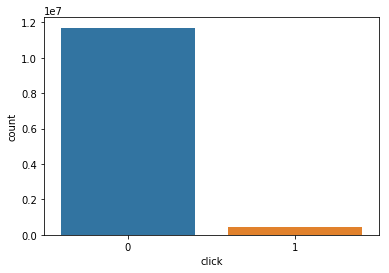

In [5]:
sns.countplot(x='click', data=df)

<div class="alert alert-warning">
  <strong>Dataset is imbalanced!</strong>  This is a case of rare event occurence.
</div>


# Undersampling - Solution to the problem

We'll focus on majority class and try to undersample it.

In [6]:
df[df.click==0]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
5,2017-01-14 12:08:49,2729292.0,961176,33638,47079934,e,Google Chrome,Mobile,0
6,2017-01-12 13:07:08,7007059.0,664666,68847,58604466,b,Edge,NaN,0
7,2017-01-13 05:58:13,7295565.0,144797,33638,23981625,b,Firefox,Mobile,0
8,2017-01-18 13:00:54,2116058.0,376073,15912,30860214,c,Edge,Tablet,0
9,2017-01-14 12:38:58,5329483.0,952097,89680,74363610,a,Edge,Tablet,0


In [7]:
df_0 = df[df.click==0]

Getting indices of majority class having any value missing so that we can remove them.

In [8]:
total = df_0.isnull().sum(axis=1).sort_values(ascending=False)
percent = (df_0.isnull().sum(axis=1)/df_0.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_row', 'Percent'])
index = missing_data[missing_data.Percent > 0].index

In [9]:
df_1 = df[df.click==1]

In [10]:
total2 = df_1.isnull().sum(axis=1).sort_values(ascending=False)
percent2 = (df_1.isnull().sum(axis=1)/df_1.isnull().count(axis=1)).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total_missing_values_per_row2', 'Percent2'])
missing_data2[missing_data2.Percent2 > 0].index

Int64Index([ 5428908,  4031984,  5403458,  6304301,  8140332, 11199787,
             6092089, 11704473, 10136057,  4004474,
            ...
             1070587, 12003219, 11013552, 11013544,   672004,   671895,
            11559893, 11557898,  1551526,   680378],
           dtype='int64', length=119714)

First, we'll remove rows with click = 0 having any Nan values. 
We were able to remove 3,196,483 rows by this method.

In [11]:
df.drop(index,inplace=True)

In [12]:
df[df.click==0]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
1,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
3,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0
5,2017-01-14 12:08:49,2729292.0,961176,33638,47079934,e,Google Chrome,Mobile,0
7,2017-01-13 05:58:13,7295565.0,144797,33638,23981625,b,Firefox,Mobile,0
8,2017-01-18 13:00:54,2116058.0,376073,15912,30860214,c,Edge,Tablet,0
9,2017-01-14 12:38:58,5329483.0,952097,89680,74363610,a,Edge,Tablet,0
10,2017-01-14 11:06:26,6436389.0,949077,76239,65017662,a,Edge,Tablet,0
11,2017-01-12 03:36:53,6401189.0,68770,43612,74868704,b,Google Chrome,Mobile,0
12,2017-01-18 14:52:22,6139730.0,781977,97863,56008048,b,Mozilla Firefox,Desktop,0


Now we are left with 8,941,327 datapoints. Lets check if its balanced or not.

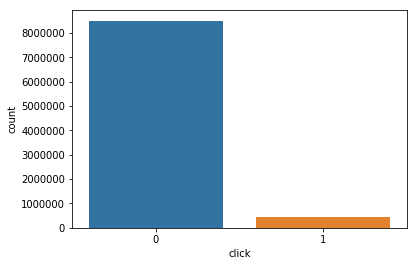

In [13]:
sns.countplot(x='click', data=df)

<div class="alert alert-danger">
  <strong>Alas!</strong> It still is an imbalanced dataset!
</div>


***
- Some insight before undersampling which would help us to impute missing values later

Finding realtion between browserid and devid for missing data imputation.

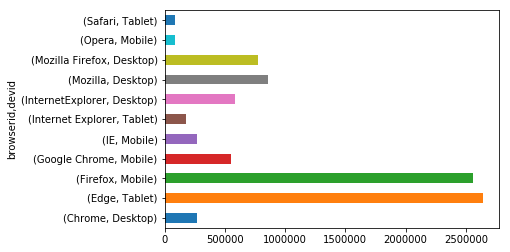

In [14]:
df.groupby(['browserid', 'devid']).click.count().plot(kind='barh')

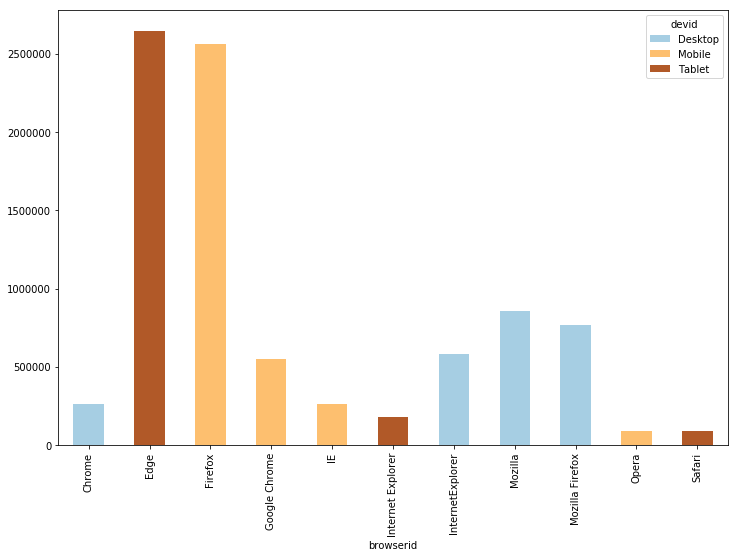

In [15]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
# crosstab
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

<div class="alert alert-success">
  <strong>Yay!</strong> Clearly, dev id depends on browserid. We would impute devid based on browserid.
</div>


Capturing unique categories in each column before undersampling

In [16]:
Z = df.nunique()

In [17]:
Z.sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         219014
datetime       513374
offerid        809977
dtype: int64

**Random Undersampling** for majority class

In [18]:
ones = int(len(df[df['click'] == 1])*1.5)

zeros = df[df.click == 0].index

random_indices = np.random.choice(zeros,ones,replace=False)

one_indices = df[df.click == 1].index

under_sample_indices = np.concatenate([one_indices,random_indices])

under_sample = df.loc[under_sample_indices]

df = under_sample

In [19]:
df

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
13,2017-01-15 21:43:34,6718234.0,433512,43612,57517812,c,NaN,Desktop,1
16,2017-01-10 15:28:24,469603.0,385750,93286,7122654,a,Google Chrome,Mobile,1
35,2017-01-14 19:01:18,5369414.0,513860,27655,92826840,f,Google Chrome,Mobile,1
67,2017-01-11 19:21:58,6005717.0,956737,1678,60293830,f,InternetExplorer,Desktop,1
90,2017-01-16 14:29:36,7979331.0,501647,68947,58321067,f,Mozilla,Desktop,1
153,2017-01-17 00:04:53,2092870.0,400635,43897,46512126,c,Firefox,Mobile,1
187,2017-01-20 12:49:37,94250.0,527842,23576,16150900,c,Safari,Tablet,1
205,2017-01-15 01:00:05,7885100.0,913591,15912,7181598,d,Firefox,Mobile,1
208,2017-01-15 06:30:23,9335708.0,188867,3643,555603,d,NaN,Mobile,1
222,2017-01-16 02:56:27,5571806.0,103249,40339,43452411,a,InternetExplorer,Desktop,1


Lets have a look at the undersampled data distribution.

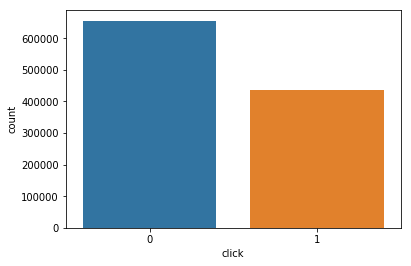

In [19]:
sns.countplot(x='click', data=df)

<div class="alert alert-success">
  <strong>Nice!</strong> This distribution now seems good. Lets analyse whether we were able to retain most of categories.
</div>

- Unique categories left in each column after undersampling.

In [20]:
X = df.nunique()

In [21]:
X.sort_values()

click               2
devid               3
countrycode         6
browserid          11
category          271
merchant          697
siteid         210542
offerid        384945
datetime       435492
dtype: int64

Lets compare the unique categories we were able to retain in each feature.

In [22]:
unique_categories = pd.concat([Z,X], axis=1)
unique_categories.columns = ['Before','After']
unique_categories

,Before,After
datetime,513374,435492
siteid,219014,210542
offerid,809977,384945
category,271,271
merchant,697,697
countrycode,6,6
browserid,11,11
devid,3,3
click,2,2


<div class="alert alert-warning">
  <strong>We seem to have done a fair job in retaining unique categories except for some features.</strong>
      <li><p>'offerid' lost a sizeble chunk of its unique categories. Maybe we'll try to assign less weightage to this feature if possible.</p></li>
      <li><p>Rest all features seem to have done a decent job.</p></li>
</div>

# Filling out missing values

###  1.  First for *browserid*

Browserid is to be filled based on country. Lets check missing browser values countrywise.

In [23]:
print("For country A:",df[df.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df[df.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df[df.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df[df.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df[df.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df[df.countrycode=='f']['browserid'].isnull().sum())

For country A: 1088
For country B: 1048
For country C: 10778
For country D: 6645
For country E: 1089
For country F: 1066


- Lets try to find the mode value of browser country-wise using plots.

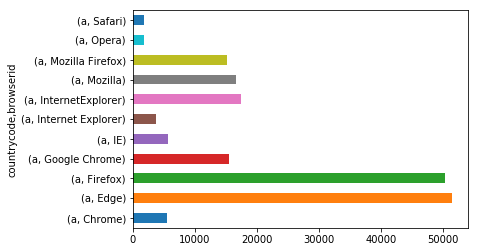

In [24]:
df[df.countrycode=='a'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

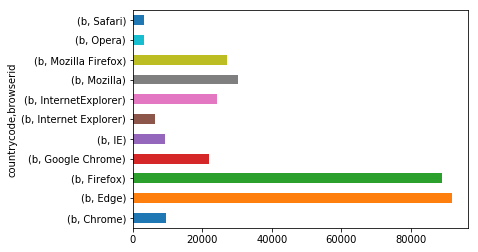

In [25]:
df[df.countrycode=='b'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

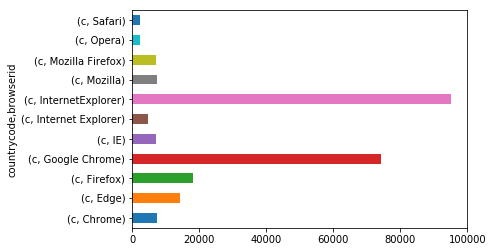

In [26]:
df[df.countrycode=='c'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

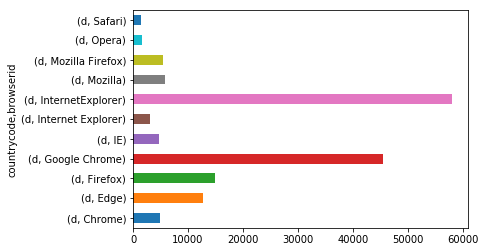

In [27]:
df[df.countrycode=='d'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

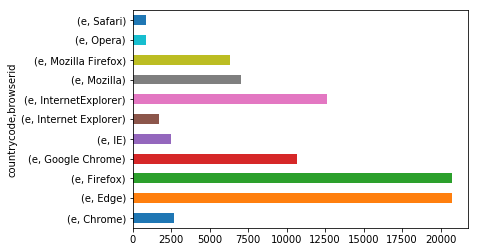

In [28]:
df[df.countrycode=='e'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

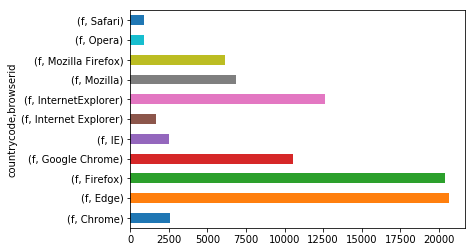

In [29]:
df[df.countrycode=='f'].groupby(['countrycode','browserid']).click.count().plot(kind='barh')

Imputing missing values for browserid

In [30]:
df.loc[(df['countrycode']=='a') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='b') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='c') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='d') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'
df.loc[(df['countrycode']=='e') & (df['browserid'].isnull()) ,'browserid']='Edge'
df.loc[(df['countrycode']=='f') & (df['browserid'].isnull()) ,'browserid']='InternetExplorer'

In [31]:
print("For country A:",df[df.countrycode=='a']['browserid'].isnull().sum())
print("For country B:",df[df.countrycode=='b']['browserid'].isnull().sum())
print("For country C:",df[df.countrycode=='c']['browserid'].isnull().sum())
print("For country D:",df[df.countrycode=='d']['browserid'].isnull().sum())
print("For country E:",df[df.countrycode=='e']['browserid'].isnull().sum())
print("For country F:",df[df.countrycode=='f']['browserid'].isnull().sum())

For country A: 0
For country B: 0
For country C: 0
For country D: 0
For country E: 0
For country F: 0


### 2. Then for browserid

Filling up devid based on Browser feature

In [32]:
df.loc[((df['browserid']=='Safari')|(df['browserid']=='Edge')|(df['browserid']=='Internet Explorer')) & (df['devid'].isnull()) ,'devid']='Tablet'
df.loc[((df['browserid']=='Opera')|(df['browserid']=='IE')|(df['browserid']=='Firefox')|(df['browserid']=='Google Chrome')) & (df['devid'].isnull()) ,'devid']='Mobile'
df.loc[((df['browserid']=='InternetExplorer')|(df['browserid']=='Mozilla')|(df['browserid']=='Mozilla Firefox')|(df['browserid']=='Chrome')) & (df['devid'].isnull()) ,'devid']='Desktop'

In [33]:
df[df['devid'].isnull()]

,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click


### Feature Engineering : Extracting time information from datetime column

In [34]:
df['new_time'] = [d.split(' ')[1] for d in df['datetime']]

In [35]:
def convertTimeToQuarter(time):
    str_time = str(time)
    hour = str_time.split(':')[0]
    quarter = ''
    if int(hour) < 6:
        quarter = 'phase1'
    elif int(hour) < 12: 
        quarter = 'phase2'
    elif int(hour) < 18: 
        quarter = 'phase3'
    else:
        quarter = 'phase4'
    return quarter

In [36]:
df['time_phase'] = [convertTimeToQuarter(d) for d in df['new_time']]

In [37]:
df.iloc[:,[0,9,10]]

,datetime,new_time,time_phase
13,2017-01-15 21:43:34,21:43:34,phase4
16,2017-01-10 15:28:24,15:28:24,phase3
35,2017-01-14 19:01:18,19:01:18,phase4
67,2017-01-11 19:21:58,19:21:58,phase4
90,2017-01-16 14:29:36,14:29:36,phase3
153,2017-01-17 00:04:53,00:04:53,phase1
187,2017-01-20 12:49:37,12:49:37,phase3
205,2017-01-15 01:00:05,01:00:05,phase1
208,2017-01-15 06:30:23,06:30:23,phase2
222,2017-01-16 02:56:27,02:56:27,phase1


### Popping old columns as they serve no purpose

In [38]:
df.pop('datetime')
df.pop('new_time')

13          21:43:34
16          15:28:24
35          19:01:18
67          19:21:58
90          14:29:36
153         00:04:53
187         12:49:37
205         01:00:05
208         06:30:23
222         02:56:27
252         13:25:22
258         20:05:13
299         08:31:09
364         14:30:41
380         17:08:53
389         14:50:30
398         17:38:39
403         13:51:39
446         14:38:20
455         07:27:45
457         01:07:19
536         13:52:35
591         22:46:09
655         17:58:43
666         15:56:02
744         17:09:00
770         16:50:39
815         11:38:31
830         10:24:26
936         22:38:43
              ...   
12044875    17:00:34
2856128     22:25:24
11119971    17:54:03
6858496     16:29:21
7661774     13:38:57
1920389     11:07:18
4167642     17:45:01
12112026    12:59:40
4093057     15:44:24
3768982     14:22:48
9893421     12:36:22
10485856    13:42:42
3773503     11:48:47
10579718    15:24:18
7534557     16:22:41
4409608     08:35:55
3629328     0

### 3. Lastly, forward filling for missing siteid

In [39]:
df.siteid.fillna(method='ffill', inplace=True)

Before proceeding lets check if there are any missing values left.

In [40]:
df.isnull().sum()

siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
time_phase     0
dtype: int64

- Lets have a look at the different browsers present in the data. Clearly, we can merge some of them together.

In [41]:
df.browserid.value_counts()

InternetExplorer     238538
Edge                 214876
Firefox              213440
Google Chrome        178195
Mozilla               73847
Mozilla Firefox       67204
Chrome                32303
IE                    31847
Internet Explorer     21334
Safari                10778
Opera                 10673
Name: browserid, dtype: int64

### Clubbing similar browsers together

In [42]:
#Merging all similar browsers

df['browserid']=df.browserid.str.replace("InternetExplorer","IE")
df['browserid']=df.browserid.str.replace("Internet Explorer","IE")

df['browserid']=df.browserid.str.replace("Mozilla Firefox","Firefox")
df['browserid']=df.browserid.str.replace("Mozilla","Firefox")

df['browserid']=df.browserid.str.replace("Google Chrome","Chrome")

In [43]:
df.browserid.value_counts()

Firefox    354491
IE         291719
Edge       214876
Chrome     210498
Safari      10778
Opera       10673
Name: browserid, dtype: int64

<div class="alert alert-success">
  <strong>Perfect!</strong> This seems correct !
</div>

In [44]:
df

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,6718234.0,433512,43612,57517812,c,IE,Desktop,1,phase4
16,469603.0,385750,93286,7122654,a,Chrome,Mobile,1,phase3
35,5369414.0,513860,27655,92826840,f,Chrome,Mobile,1,phase4
67,6005717.0,956737,1678,60293830,f,IE,Desktop,1,phase4
90,7979331.0,501647,68947,58321067,f,Firefox,Desktop,1,phase3
153,2092870.0,400635,43897,46512126,c,Firefox,Mobile,1,phase1
187,94250.0,527842,23576,16150900,c,Safari,Tablet,1,phase3
205,7885100.0,913591,15912,7181598,d,Firefox,Mobile,1,phase1
208,9335708.0,188867,3643,555603,d,IE,Mobile,1,phase2
222,5571806.0,103249,40339,43452411,a,IE,Desktop,1,phase1


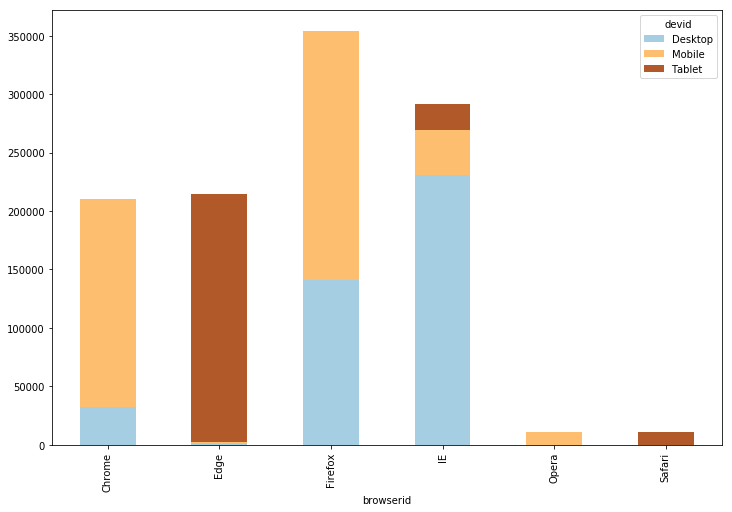

In [45]:
crosstab = pd.crosstab(index=df["browserid"], columns=df["devid"])
# crosstab
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

### Target encoding using scikit learn 

In [46]:
# X_train = df1[[col for col in df1.columns if col != 'click']]
# y_train = df1['click']
# from category_encoders.target_encoder import TargetEncoder
# MeanEncoder = TargetEncoder(cols=['siteid','offerid','category','merchant','countrycode','browserid','devid'])
# MeanEncoder.fit(X_train,y_train)
# df3 = MeanEncoder.transform(X_train)
# X_train = X_train.head()
# y_train = y_train.head()

### Mean Encoding of features

In [47]:
time_phase = pd.crosstab(index=df["time_phase"], columns=df["click"])
time_phase

click,0,1
time_phase,,
phase1,28381,26182
phase2,217563,125280
phase3,368873,167459
phase4,41004,118293


In [48]:
time_phase['ME']=time_phase[1]/(time_phase[1]+time_phase[0])
time_phase

click,0,1,ME
time_phase,,,
phase1,28381,26182,0.479849
phase2,217563,125280,0.365415
phase3,368873,167459,0.312230
phase4,41004,118293,0.742594


In [49]:
time_phase.pop(0)
time_phase.pop(1)

time_phase
phase1     26182
phase2    125280
phase3    167459
phase4    118293
Name: 1, dtype: int64

In [50]:
time_phase = pd.Series(time_phase.ME)

In [51]:
df['time_phase'] = df['time_phase'].map(time_phase)

In [52]:
browserid = pd.crosstab(index=df["browserid"], columns=df["click"])
browserid

click,0,1
browserid,,
Chrome,52632,157866
Edge,203177,11699
Firefox,321507,32984
IE,65420,226299
Opera,6515,4158
Safari,6570,4208


In [53]:
browserid['ME']=browserid[1]/(browserid[1]+browserid[0])
browserid

click,0,1,ME
browserid,,,
Chrome,52632,157866,0.749964
Edge,203177,11699,0.054445
Firefox,321507,32984,0.093046
IE,65420,226299,0.775743
Opera,6515,4158,0.389581
Safari,6570,4208,0.390425


In [54]:
browserid.pop(0)
browserid.pop(1)

browserid
Chrome     157866
Edge        11699
Firefox     32984
IE         226299
Opera        4158
Safari       4208
Name: 1, dtype: int64

In [55]:
browserid = pd.Series(browserid.ME)

In [56]:
df['browserid'] = df['browserid'].map(browserid)

In [57]:
devid = pd.crosstab(index=df["devid"], columns=df["click"])
devid
devid['ME']=devid[1]/(devid[1]+devid[0])
devid
devid.pop(0)
devid.pop(1)
devid = pd.Series(devid.ME)
df['devid'] = df['devid'].map(devid)

In [58]:
countrycode = pd.crosstab(index=df["countrycode"], columns=df["click"])
countrycode
countrycode['ME']=countrycode[1]/(countrycode[1]+countrycode[0])
countrycode
countrycode.pop(0)
countrycode.pop(1)
countrycode = pd.Series(countrycode.ME)
df['countrycode'] = df['countrycode'].map(countrycode)

In [59]:
siteid = pd.crosstab(index=df["siteid"], columns=df["click"])
siteid
siteid['ME']=siteid[1]/(siteid[1]+siteid[0])
siteid
siteid.pop(0)
siteid.pop(1)
siteid = pd.Series(siteid.ME)
df['siteid'] = df['siteid'].map(siteid)

In [60]:
category = pd.crosstab(index=df["category"], columns=df["click"])
category
category['ME']=category[1]/(category[1]+category[0])
category
category.pop(0)
category.pop(1)
category = pd.Series(category.ME)
df['category'] = df['category'].map(category)

In [61]:
merchant = pd.crosstab(index=df["merchant"], columns=df["click"])
merchant
merchant['ME']=merchant[1]/(merchant[1]+merchant[0])
merchant
merchant.pop(0)
merchant.pop(1)
merchant = pd.Series(merchant.ME)
df['merchant'] = df['merchant'].map(merchant)

In [62]:
offerid = pd.crosstab(index=df["offerid"], columns=df["click"])
offerid
offerid['ME']=offerid[1]/(offerid[1]+offerid[0])
offerid
offerid.pop(0)
offerid.pop(1)
offerid = pd.Series(offerid.ME)
df['offerid'] = df['offerid'].map(offerid)

### Lets have a final glance at the data before proceeding with training the model.

In [63]:
df

,siteid,offerid,category,merchant,countrycode,browserid,devid,click,time_phase
13,1.000000,0.200000,0.469852,0.622191,0.869128,0.775743,0.563022,1,0.742594
16,0.333333,1.000000,0.337568,0.450433,0.116134,0.749964,0.421746,1,0.312230
35,1.000000,0.500000,0.262270,0.628788,0.251893,0.749964,0.421746,1,0.742594
67,0.666667,1.000000,0.456535,0.630769,0.251893,0.775743,0.563022,1,0.742594
90,1.000000,1.000000,0.298880,0.291649,0.251893,0.093046,0.563022,1,0.312230
153,1.000000,0.375000,0.387399,0.391185,0.869128,0.093046,0.421746,1,0.479849
187,0.333333,1.000000,0.398850,0.339433,0.869128,0.390425,0.090941,1,0.312230
205,1.000000,0.714286,0.243545,0.392798,0.799136,0.093046,0.421746,1,0.479849
208,0.096000,0.632653,0.510764,0.456534,0.799136,0.775743,0.421746,1,0.365415
222,0.535294,0.096879,0.198144,0.102240,0.116134,0.775743,0.563022,1,0.479849


### Splitting of data into X and y

In [64]:
feature_cols = ['siteid', 'offerid', 'category', 'merchant','countrycode','browserid','devid','time_phase']
X = df[feature_cols]
y = df.click

### Train-Test-Validation Split

In [65]:
from sklearn.model_selection import train_test_split

Here we want to split our data into 3 sets in the ratio (70:20:10). 
- Train (70%)
- Test (20%)
- Validation (10%)

This is achieved using 2 fold train test split. First, we split the data into train and temp set in the ratio 7:3. Later, temp set is split in the ration 2:1 therby giving us 70:20:10 ratio.

In [66]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size = 0.3)
X_test,X_valid,y_test,y_valid = train_test_split(X_temp,y_temp,test_size = 0.33)

### Training the model
***

First, we'll train the model on simple logistic regression and check the results.

#### Simple logistic regression using default polynomial features:

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [68]:
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('add_poly_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [69]:
y_pred=pipeline.predict(X_test)

#### Model Evaluation for simple logistic regression

- Predictions with confidence score

In [70]:
pred = pd.DataFrame(pipeline.predict(X_test))

In [71]:
prob = pd.DataFrame(pipeline.predict_proba(X_test))

In [72]:
final = pd.concat([pred,prob], axis=1)
final.columns = ['Prediction','Confidence_score_0','Confidence_score_1']
final

,Prediction,Confidence_score_0,Confidence_score_1
0,0,0.999983,0.000017
1,1,0.000238,0.999762
2,0,0.999924,0.000076
3,0,0.988531,0.011469
4,1,0.000215,0.999785
5,1,0.000075,0.999925
6,1,0.000005,0.999995
7,1,0.008124,0.991876
8,0,0.996364,0.003636
9,1,0.000007,0.999993


Lets try to find out predictions which we are not quite confident of. 

In [73]:
final[(final.Prediction == 0) & (final.Confidence_score_0 < 0.6)]

,Prediction,Confidence_score_0,Confidence_score_1
128,0,0.511504,0.488496
220,0,0.579794,0.420206
305,0,0.541288,0.458712
782,0,0.549357,0.450643
888,0,0.524686,0.475314
919,0,0.563665,0.436335
1069,0,0.596314,0.403686
1264,0,0.571605,0.428395
1562,0,0.595336,0.404664
1721,0,0.508891,0.491109


In [74]:
final[(final.Prediction == 1) & (final.Confidence_score_1 < 0.6)]

,Prediction,Confidence_score_0,Confidence_score_1
190,1,0.425984,0.574016
483,1,0.480572,0.519428
590,1,0.499841,0.500159
650,1,0.407888,0.592112
719,1,0.494543,0.505457
724,1,0.426901,0.573099
799,1,0.444433,0.555567
997,1,0.433313,0.566687
1183,1,0.480357,0.519643
1196,1,0.450410,0.549590


- Accuracy

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9773645880746472


- AUC/ROC score

In [76]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.9758217947506078

- Plotting AUC/ROC curve

- Confusion matrix

In [77]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm

,0,1
0,129795,2180
1,2793,84932


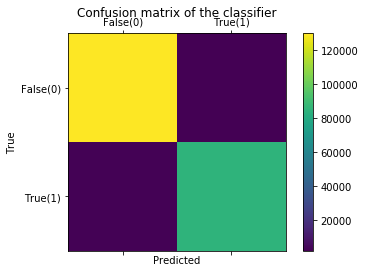

In [78]:
import matplotlib.pyplot as plt
# print(cm)
labels = ['False(0)', 'True(1)']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- Precision & Recall

- F1 score

In [79]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.971556363927544

#### Randomsearch for Logistic Regression using L1,L2 penalty

Now lets try tweaking the model using some regulariztion techniques and see how well it does.

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', LogisticRegression(random_state = 9))])

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
params = {'add_poly_features__degree'   :range(0,4),
          'logistic_regression__penalty':['l1','l2'],
          'logistic_regression__C'      :[1,0.1,0.01,0.001]}
rand_search = RandomizedSearchCV(estimator = pipeline,param_distributions = params, n_iter=10)
rand_search.fit(X_train,y_train)
y_prediction = rand_search.predict(X_test)

In [82]:
cross_val_score(rand_search.best_estimator_,X_train,y_train)

array([0.98074043, 0.98007779, 0.98041484])